IMPORTING LIBRARIES

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn import metrics
import numpy as np 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

IMPORTING DATASET

In [2]:
df = pd.read_excel("ML-data.xlsx")

CONVERTING STRING DATA TO NUMERICAL DATA

In [3]:
label_encoder_genre = LabelEncoder()
label_encoder_artist = LabelEncoder()
label_encoder_album = LabelEncoder()

df['genre'] = label_encoder_genre.fit_transform(df['genre'])
df['artist'] = label_encoder_artist.fit_transform(df['artist'])
df['album'] = label_encoder_album.fit_transform(df['album'])
df['ratings_rounded'] = df['rating'].round().astype(int)

SPLITTING DATA 

In [4]:
# Split the data into features (X) and target variable (y)
X = df[['genre', 'artist', 'album']]
y = df['ratings_rounded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)



RANDOM FOREST REGRESSOR

In [5]:
model = RandomForestRegressor(criterion= "squared_error", max_depth=12, n_estimators= 150)
model.fit(X_train, y_train)
predictions = np.round(model.predict(X_test)).astype(int)

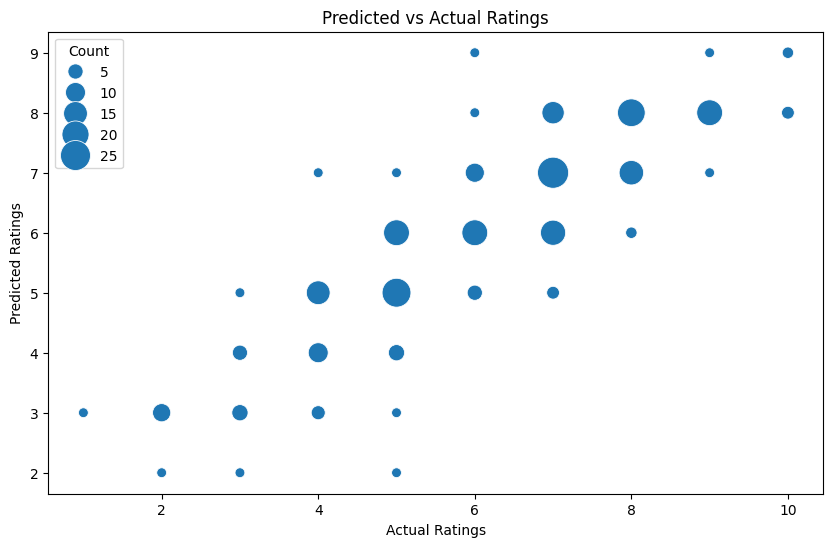

In [6]:
df_scatter = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
count_df = df_scatter.groupby(['Actual', 'Predicted']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', size='Count', data=count_df, sizes=(50, 500))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Predicted vs Actual Ratings')
plt.show()

In [7]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.6666666666666666
Mean Squared Error: 0.842911877394636
Root Mean Squared Error: 0.918102324032913


KNN

In [8]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = np.round(knn.predict(X_test)).astype(int)

In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.7203065134099617
Mean Squared Error: 0.9195402298850575
Root Mean Squared Error: 0.9589266029707683


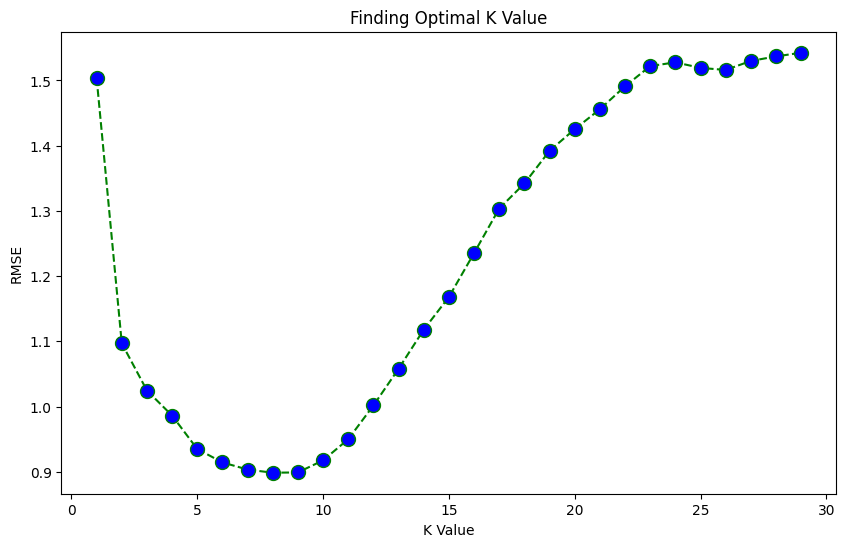

In [10]:
errors = []
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    errors.append(np.sqrt(metrics.mean_squared_error(y_test, pred_i)))
plt.figure(figsize=(10,6))
plt.plot(range(1,30),errors,color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Finding Optimal K Value')
plt.xlabel('K Value')
plt.ylabel('RMSE')
plt.show()

In [11]:
knn = KNeighborsRegressor(n_neighbors= 8, weights= "distance", algorithm= "auto", leaf_size= 10) 
knn.fit(X_train, y_train)
predictions = np.round(knn.predict(X_test)).astype(int)

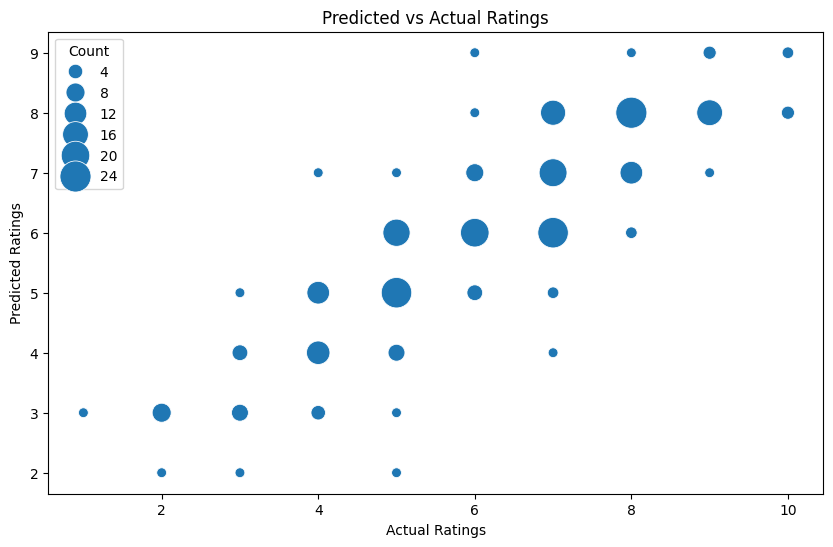

In [12]:
df_scatter = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
count_df = df_scatter.groupby(['Actual', 'Predicted']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', size='Count', data=count_df, sizes=(50, 500))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Predicted vs Actual Ratings')
plt.show()

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.6628352490421456
Mean Squared Error: 0.8544061302681992
Root Mean Squared Error: 0.9243409166904812


LINEAR REGRESSION

In [14]:
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = np.round(lm.predict(X_test)).astype(int)


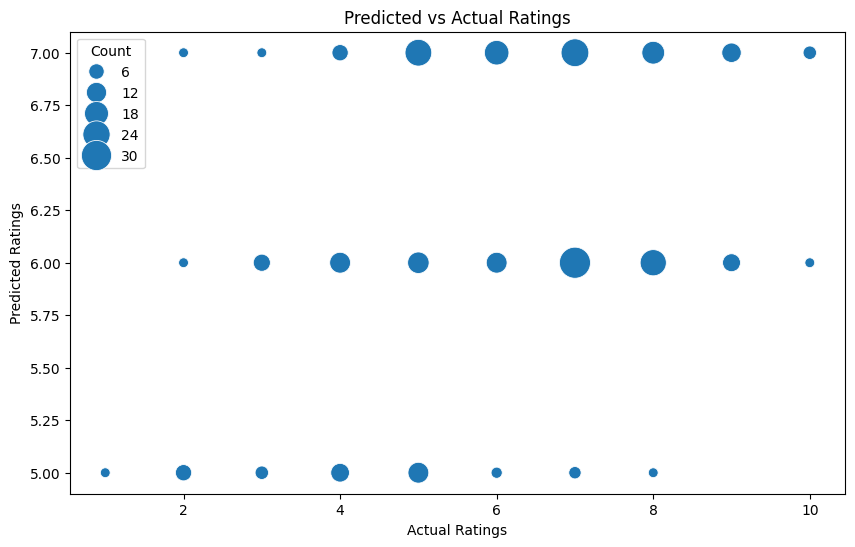

In [15]:
df_scatter = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
count_df = df_scatter.groupby(['Actual', 'Predicted']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', size='Count', data=count_df, sizes=(50, 500))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Predicted vs Actual Ratings')
plt.show()

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 1.4329501915708813
Mean Squared Error: 3.103448275862069
Root Mean Squared Error: 1.7616606585441104


DECISION TREE

In [17]:
dtree = DecisionTreeRegressor(criterion= "absolute_error", max_features= "log2")
dtree.fit(X_train,y_train)
predictions = np.round(dtree.predict(X_test)).astype(int)


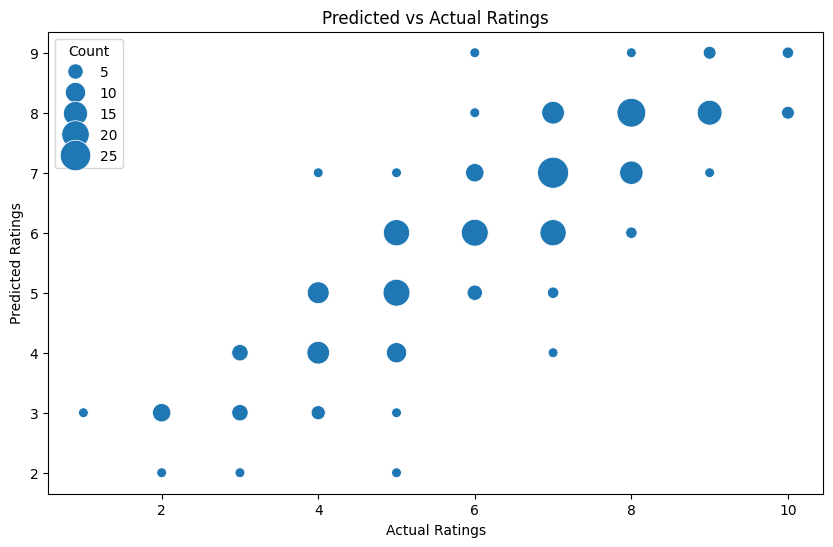

In [18]:
df_scatter = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
count_df = df_scatter.groupby(['Actual', 'Predicted']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', size='Count', data=count_df, sizes=(50, 500))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Predicted vs Actual Ratings')
plt.show()

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.6590038314176245
Mean Squared Error: 0.842911877394636
Root Mean Squared Error: 0.918102324032913
